In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

# date_updated, state, start_date, end_date, tot_cases, new_cases, tot_deaths, new_deaths, new_historic_cases, new_historic_deaths
df_states = pd.read_csv("../Data/Final_Datasets/us_state_cases.csv")

df_states["date_updated"] = pd.to_datetime(df_states["date_updated"], errors='coerce')
df_states["start_date"] = pd.to_datetime(df_states["start_date"], errors='coerce')
df_states["end_date"] = pd.to_datetime(df_states["end_date"], errors='coerce')

df_states.head(5)

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0,0,0


In [2]:
def print_graph(states_to_graph, x_col="end_date", y_col="tot_cases", x_title="Dates", y_title="Number of Cases", figure_size=(12,8), filename=""):

    colors = cm.get_cmap('tab20', len(states_to_graph))  # Use 'tab10', 'tab20', etc.

    plt.figure(figsize=figure_size)

    for i, state_code in enumerate(states_to_graph):
        cur_state_data = df_states[df_states["state"] == state_code]

        plt.plot(cur_state_data[x_col], cur_state_data[y_col], label=state_code, color=colors(i))
        
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title("Covid-19 Data by State")
    plt.legend(title="State Codes")

    if filename != "":
        plt.savefig('../Visualizations/images/states/'+filename)
        
    plt.show()


<hr>

## Total Cases by State

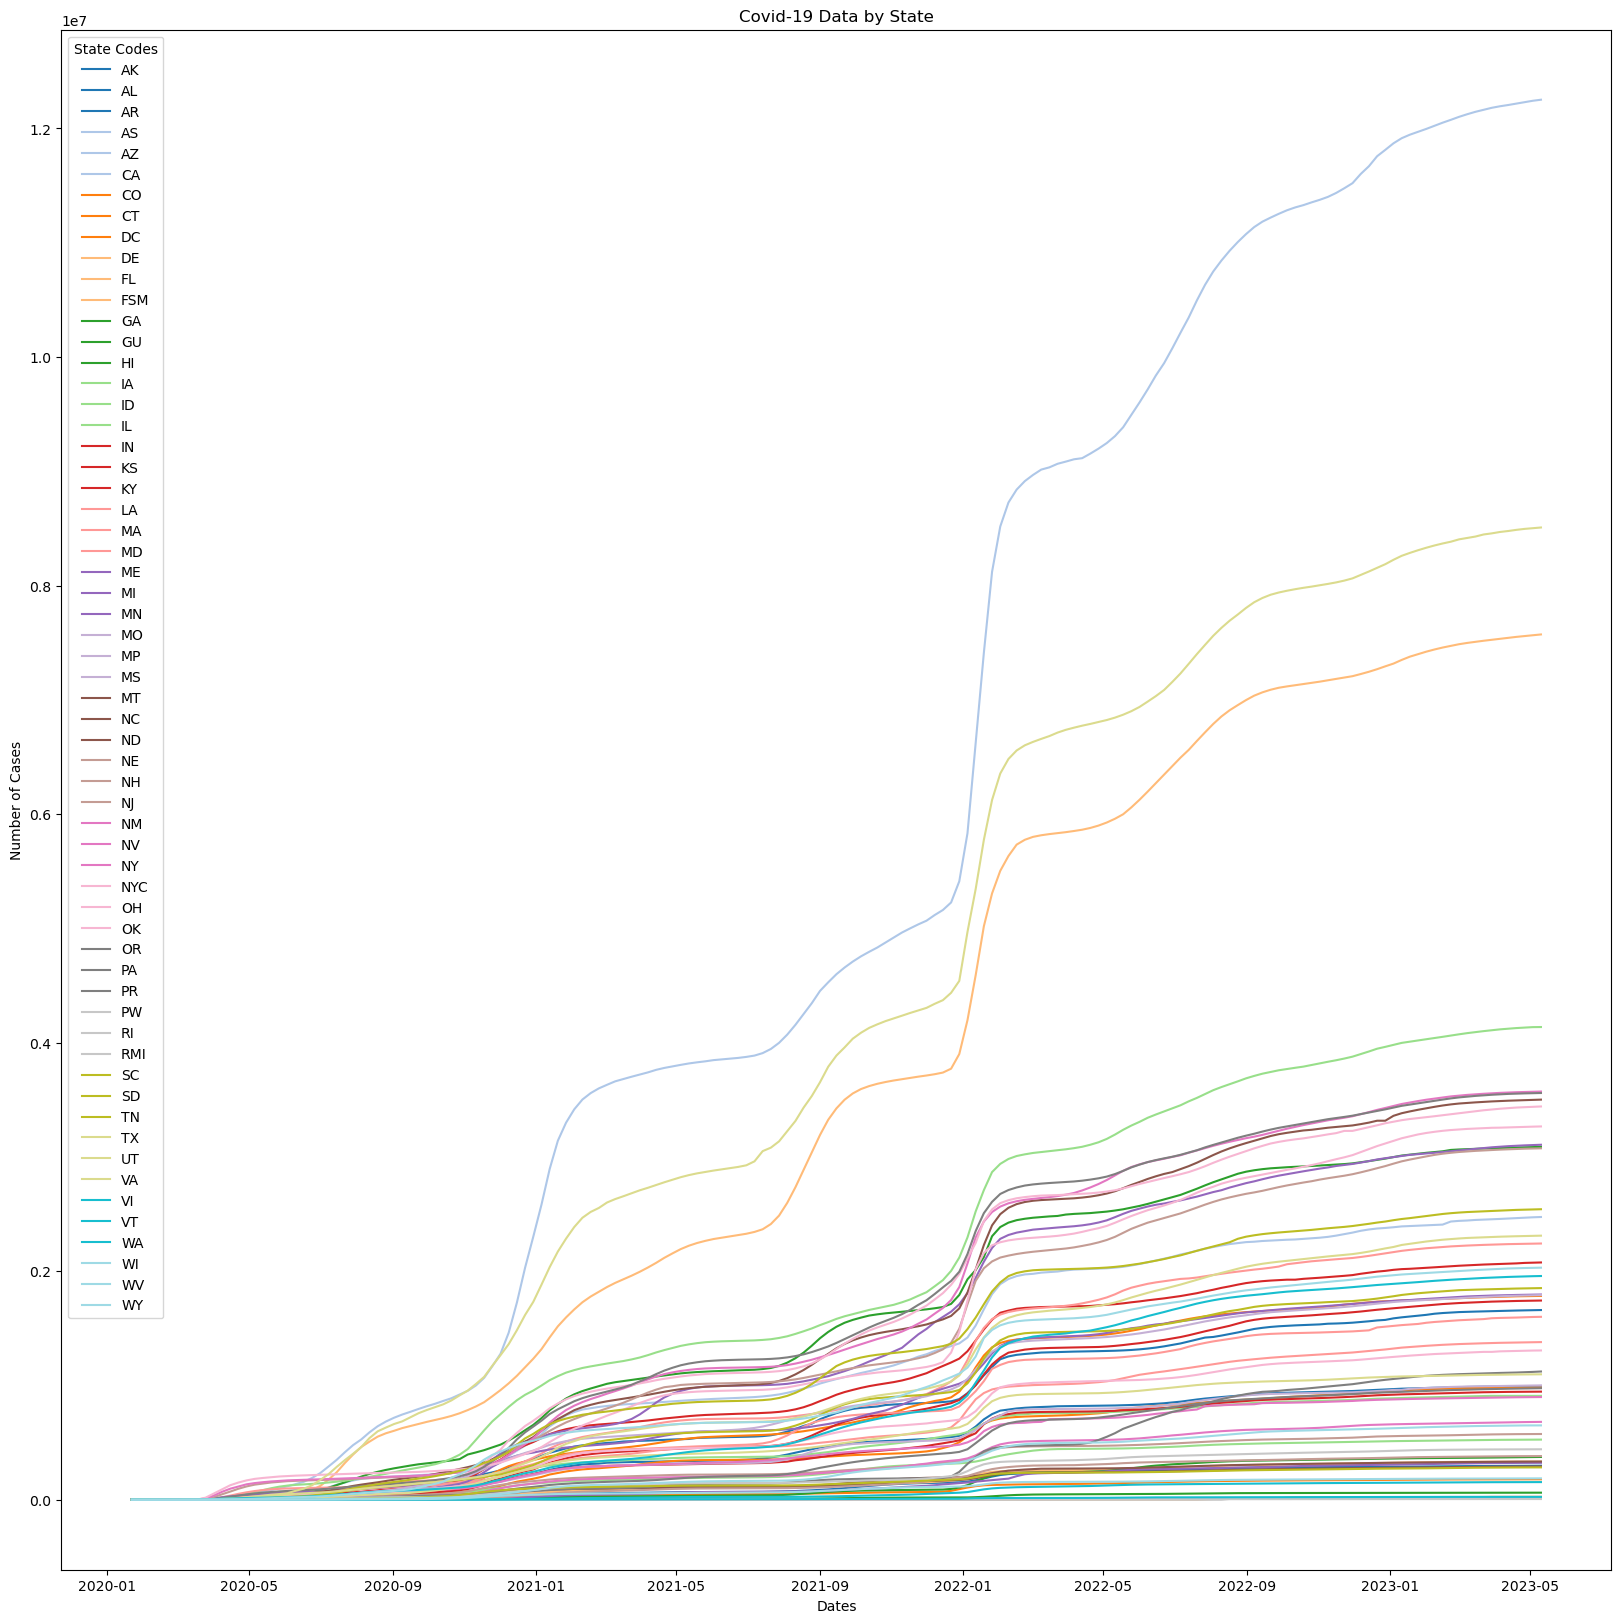

In [3]:
all_states = df_states["state"].unique()
print_graph(all_states, figure_size=(20, 20), filename="AllStates_Cases.png")

It's clear that 3 outliers have formed. The data for the 3 outliers and the next closest "normal" value are here:

In [4]:
last_day_data = df_states[df_states["end_date"] == "2023-05-10"]
last_day_data.sort_values(by="tot_cases", ascending=False).head(4)

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
1037,2023-05-11,CA,2023-05-04,2023-05-10,12251820,9186,101886,109,0,0
8995,2023-05-11,TX,2023-05-04,2023-05-10,8508204,5620,93780,42,0,0
1902,2023-05-11,FL,2023-05-04,2023-05-10,7572282,6937,88248,0,0,1109
3113,2023-05-11,IL,2023-05-04,2023-05-10,4136659,851,42005,0,0,0


Let's plot the states on their own graph to de-clutter the graph:

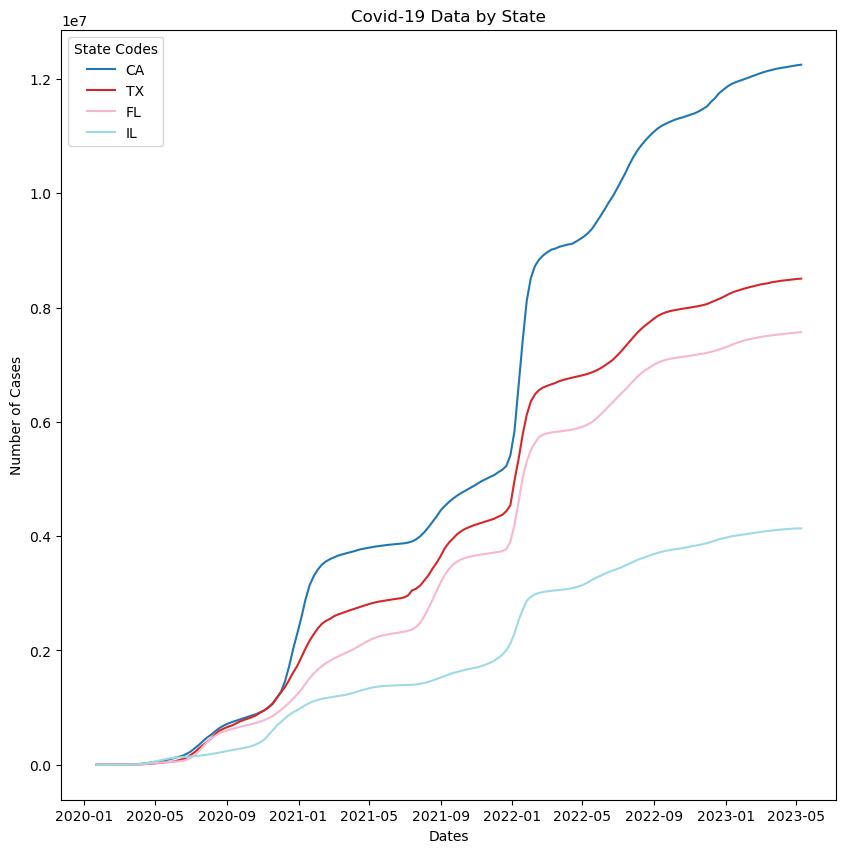

In [5]:
# Get the 3 outliers and top of data
states_to_graph = last_day_data.sort_values(by="tot_cases", ascending=False).head(4)["state"]
print_graph(states_to_graph, figure_size=(10,10), filename="Outlier_Cases.png")

<hr>

## Total Deaths by State

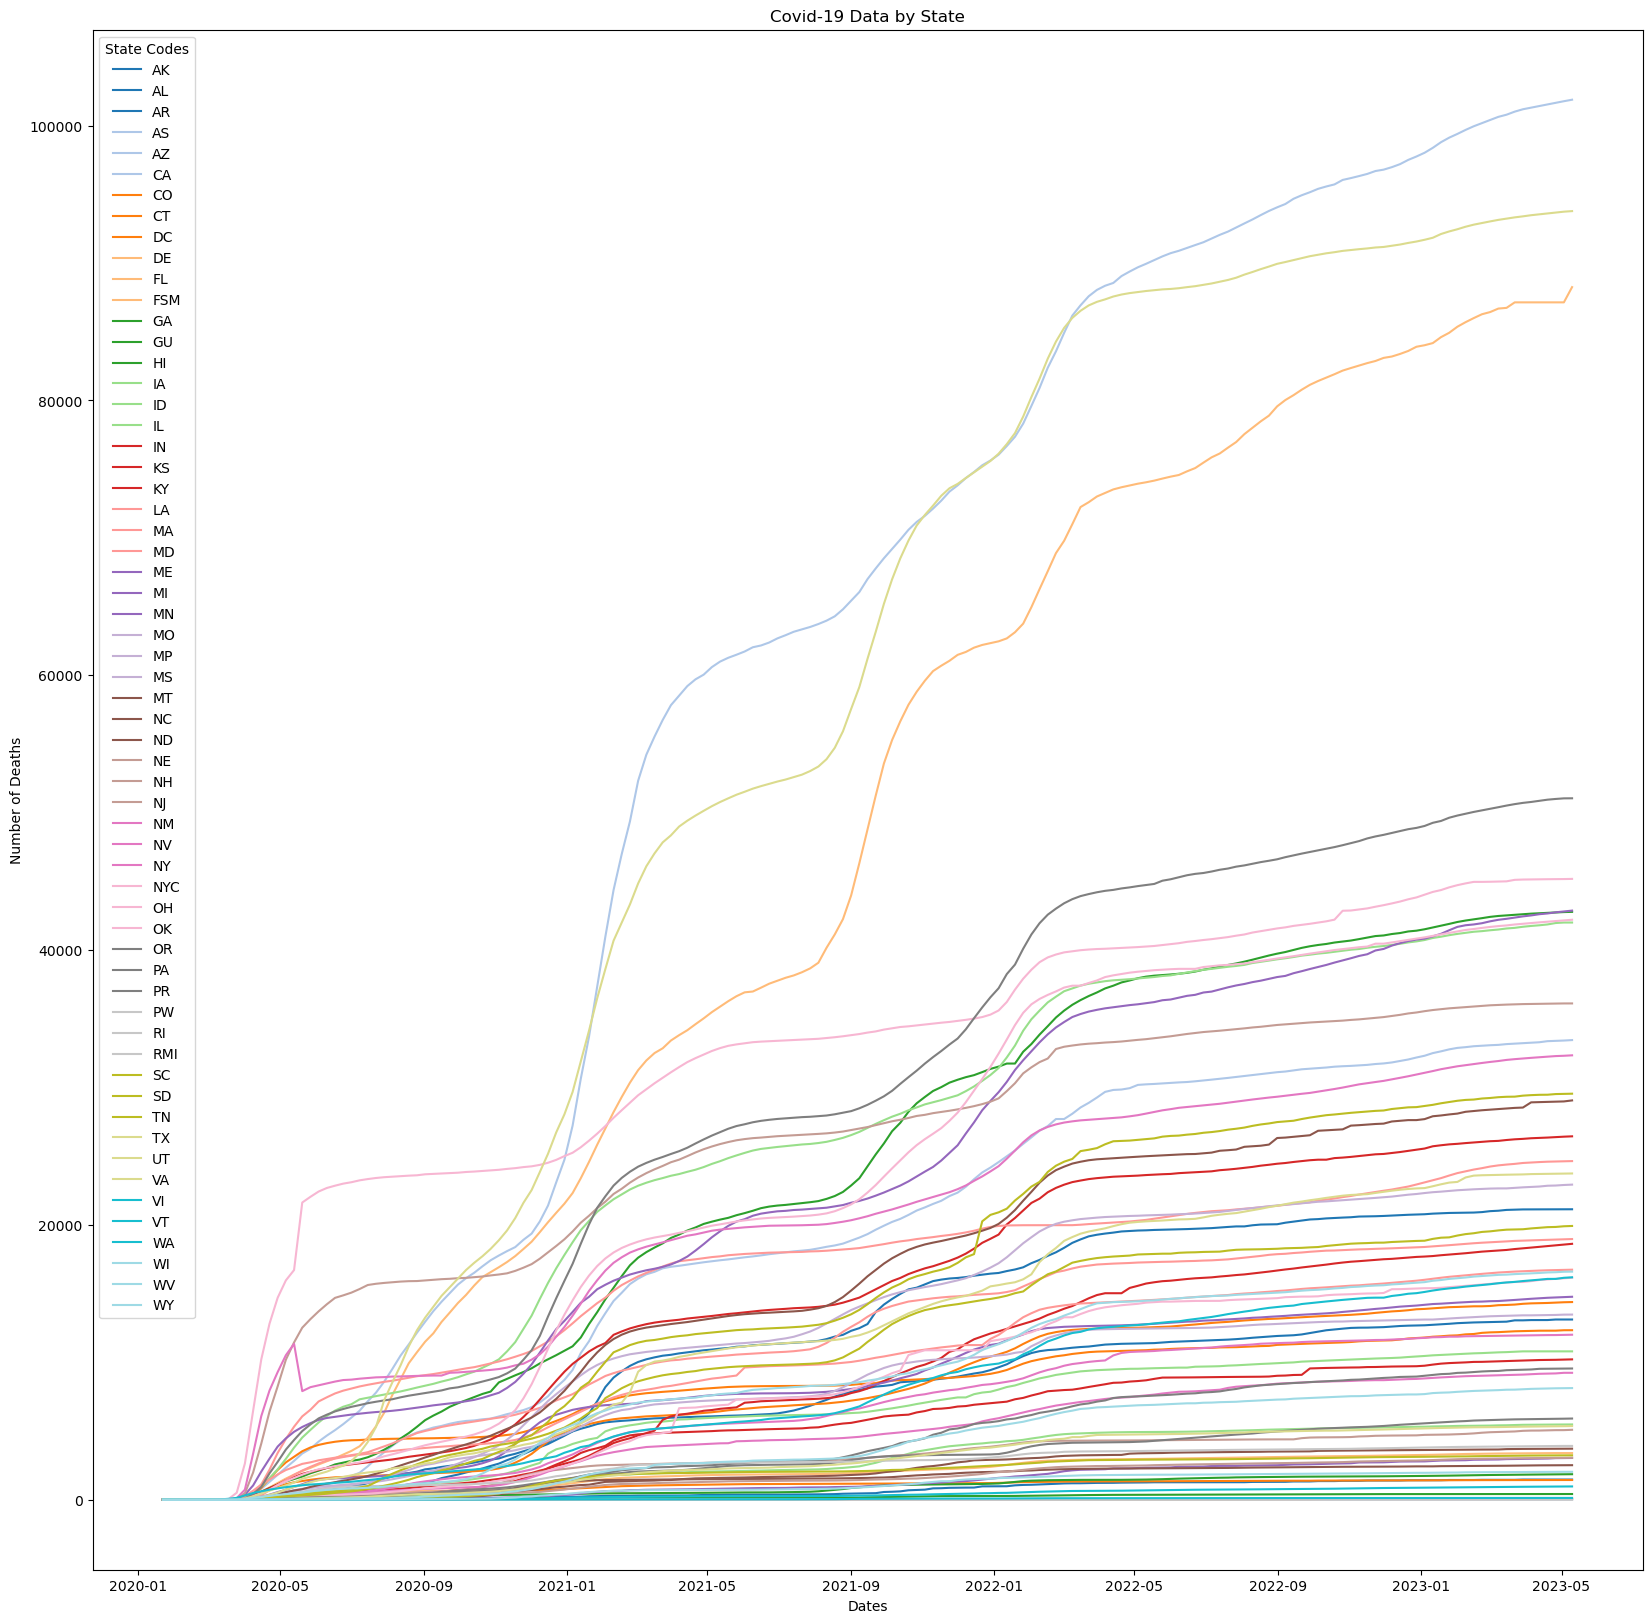

In [6]:
all_states = df_states["state"].unique()
print_graph(all_states, y_col="tot_deaths", y_title="Number of Deaths", figure_size=(20, 20), filename="AllStates_Deaths.png")

It's clear that 3 outliers have formed. The data for the 3 outliers and the next closest "normal" value are here:

In [7]:
last_day_data = df_states[df_states["end_date"] == "2023-05-10"]
last_day_data.sort_values(by="tot_deaths", ascending=False).head(4)

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
1037,2023-05-11,CA,2023-05-04,2023-05-10,12251820,9186,101886,109,0,0
8995,2023-05-11,TX,2023-05-04,2023-05-10,8508204,5620,93780,42,0,0
1902,2023-05-11,FL,2023-05-04,2023-05-10,7572282,6937,88248,0,0,1109
7611,2023-05-11,PA,2023-05-04,2023-05-10,3559331,1977,51047,5,0,0


Let's plot the states on their own graph to de-clutter the graph:

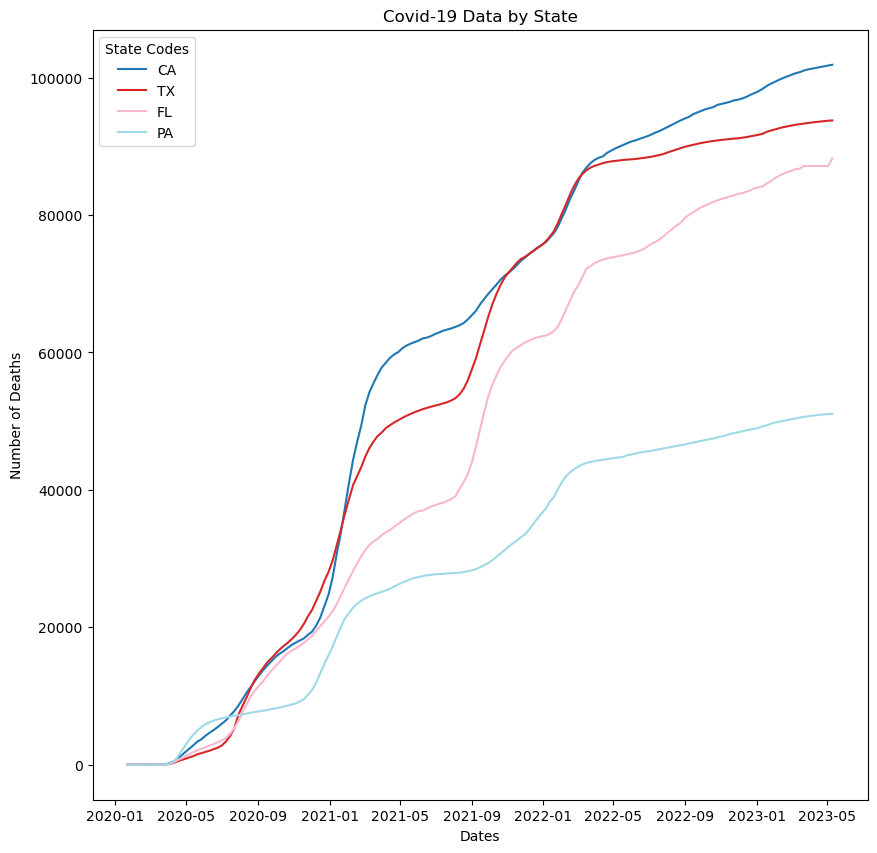

In [8]:
# Get the 3 outliers and top of rest of data
states_to_graph = last_day_data.sort_values(by="tot_deaths", ascending=False).head(4)["state"]
print_graph(states_to_graph, y_col="tot_deaths", y_title="Number of Deaths", figure_size=(10,10), filename="Outlier_Deaths.png")

We see that this time Texas actually overtook California very briefly a few times compared to the graph for the number of cases. Despite the difference in people getting sick, people are more likely to die in Texas versus California.

<hr>

## Comparing Raw Values of Cases and Deaths for Outlier States

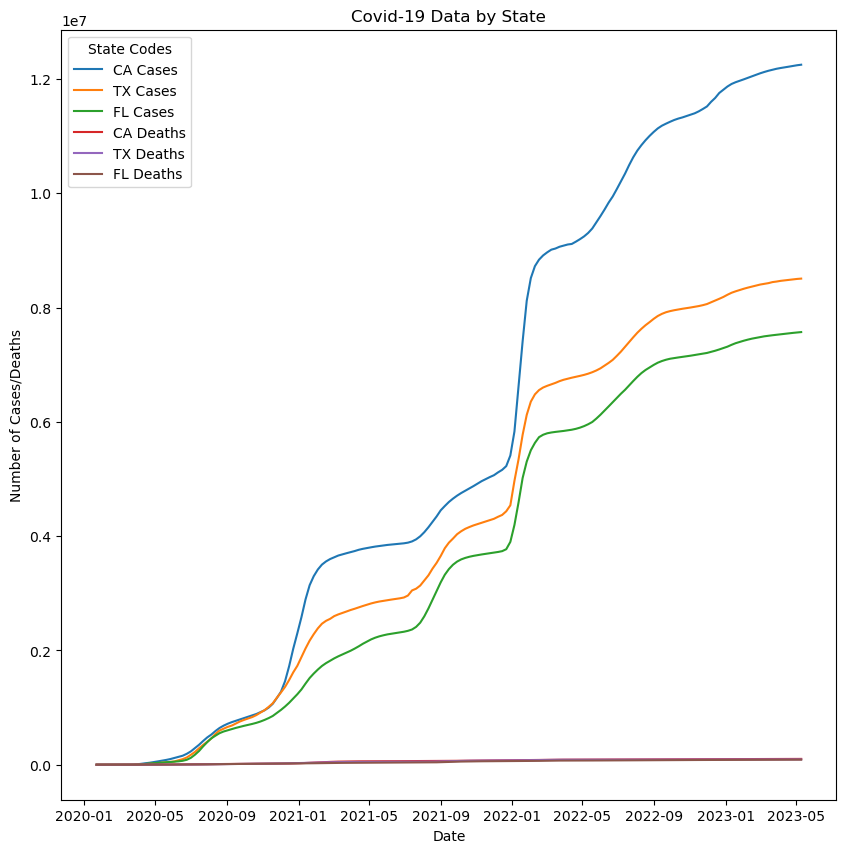

In [9]:
top_state_cases  = last_day_data.sort_values(by="tot_cases",  ascending=False).head(3)["state"]
top_state_deaths = last_day_data.sort_values(by="tot_deaths", ascending=False).head(3)["state"]

# colors = cm.get_cmap('tab10', 6)

plt.figure(figsize=(10,10))
    
for i, state_code in enumerate(top_state_cases):
    cur_state_data = df_states[df_states["state"] == state_code]
    plt.plot(cur_state_data["end_date"], cur_state_data["tot_cases"], label=(state_code+" Cases"))

for i, state_code in enumerate(top_state_deaths):
    cur_state_data = df_states[df_states["state"] == state_code]
    plt.plot(cur_state_data["end_date"], cur_state_data["tot_deaths"], label=(state_code+" Deaths"))

plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.title("Covid-19 Data by State")
plt.legend(title="State Codes")
        
plt.show()


As we can see, it's not even comparable. Despite the difference in California and Texas cases and deaths, it's still insignificant when comparing raw values.